<a href="https://colab.research.google.com/github/theTijesuni/Fall2022-EEC151/blob/main/UCD_EEC151_FQ2022_CA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# UCD EEC 151 FQ2022
# Computer Assignment 1
# 
# Convolution.
#
# IMPORTS
import numpy as np
import scipy as sp
import scipy.signal as sps
import matplotlib.pyplot as plt

Part 1.  Convolution.

Consider a system which is going to process an input signal composed of relatively long pulses.  

This system is the first-order difference (or "backwards difference") system, $y[n]=x[n] - x[n-1]$ .  

Its impulse response is $h[n] = \delta[n] - \delta[n-1]$.

The input signal has long strings of 0 followed by pulses of amplitude 1, which go on and off repeatedly.

A simple signal with two such pulses is shown in the figure below.



[Text(0.5, 1.0, 'y = convolve(h,s)')]

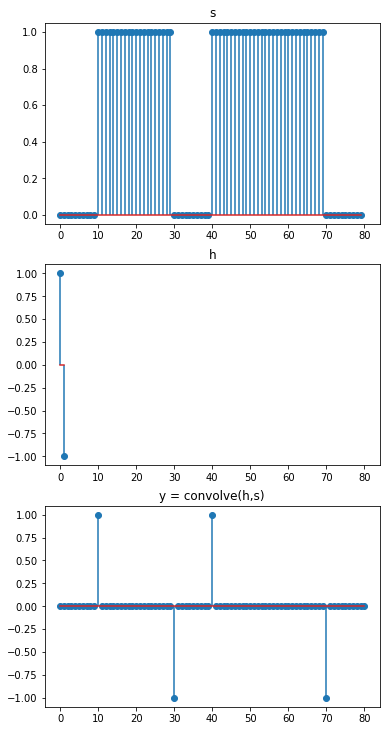

In [ ]:
# s is an input signal with some zeros, a 1-"pulse", zeros, and another pulse.
# h = [1 -1] # backwards difference system
# compute y = sps.convolve(h,s) # this is like the function conv() in MATLAB
# plot the results

s = np.zeros(80)
s[10:30] = 1.0
s[40:70] = 1.0

h = np.array([1, -1])

y = sps.convolve(h,s)

f = plt.figure()
plt.subplots_adjust(top=2.5) 

ax1 = f.add_subplot(3,1,1)
ax1.stem(s,use_line_collection=True) # use_line_collection=True to suppress warning
ax1.set(title="s")

ax2 = f.add_subplot(3,1,2,sharex=ax1)
ax2.stem(h,use_line_collection=True) # use_line_collection=True to suppress warning
ax2.set(title="h")

ax3 = f.add_subplot(3,1,3,sharex=ax1)
ax3.stem(y,use_line_collection=True) # use_line_collection=True to suppress warning
ax3.set(title="y = convolve(h,s)")



Look at the output in this case, and in particular where the output is nonzero relative to the rectangular "pulses" in s.  

Part 2.  Simple "edge detector" image processor.

The output of the backwards difference system acts as a simple transition detector.  We can use this behavior to bulid a rudimentary edge detector for black-and-white images.  

Consider an image as a 2D signal, and let's work with black-and-white images where 0 indicates black and 255 indicates white (this is the so-called additive color model that most computers use).  We can run this image through the backwards difference system, and "detect" the edges in the image.  This is a rudimentary operation that is a simple base operation that is done in computer vision applications.


First, we're going to have to tweak how we apply convolution to work better with images.  This is where the rubber meets the road, the difference between theory and working with data.  

See the docs for scipy's `convolve()` function at https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html.  We are going to process this image as a set of 1D signals by going through each row of the image, and then each column.

Note we are NOT going to use scipy's 2D convolution function `convolve2d` (you may NOT use this to complete the assignment).

We're going to use it with a mode called overlap = same, to get rid of the extra samples due to the full convolution (a length L sequence convolved with length M always gives L+M-1 samples output).  Next we're going to need to do something about the negative outputs.  For simplicity, we will just reflect them using the absolute value (and we don't care if an edge is "starting" or "ending").

Real data processing is often "messy" in this sense, where we need to handle edge cases like mapping outputs back to some valid data range.

[Text(0.5, 1.0, "y = abs( convolve(h,s,mode='same') )")]

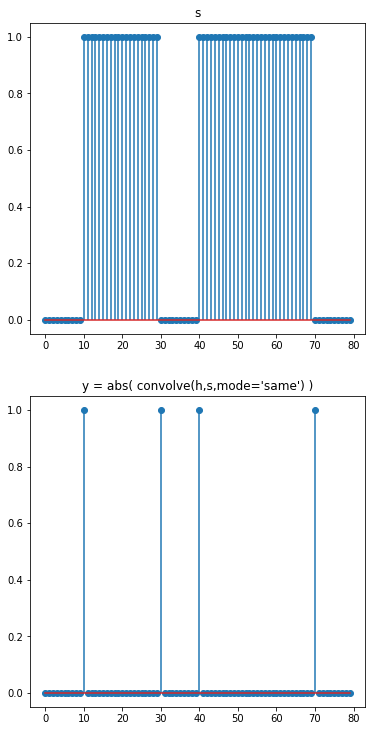

In [ ]:
y_adj = np.absolute( sps.convolve(s,h,mode="same") )

f = plt.figure()
plt.subplots_adjust(top=2.5) # push subplots apart so titles are readable

ax1 = f.add_subplot(2,1,1)
ax1.stem(s,use_line_collection=True)
ax1.set(title="s")

ax2 = f.add_subplot(2,1,2,sharex=ax1)
ax2.stem(y_adj,use_line_collection=True)
ax2.set(title="y = abs( convolve(h,s,mode='same') )")


Now for the part where you add code!

If using MATLAB to do this assignment, look at functions like `imread()`, `conv()`, and `abs()`.  Plot with `imshow()`.

The image I would like to be processed is https://www.ece.ucdavis.edu/~njacklin/eec151/CA1/plus.png .


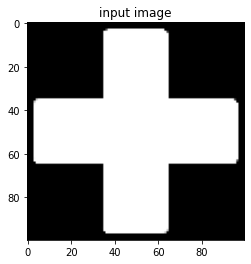

In [ ]:
# load image file as 100x100 array
# good PIL documentation: https://pillow.readthedocs.io/en/stable/reference/Image.html


from PIL import Image # Python Image Library (PIL)
from urllib.request import urlopen # open files from URL -- no saving required

img_url = 'https://www.ece.ucdavis.edu/~njacklin/eec151/CA1/plus.png'
image = np.asarray(Image.open(urlopen(img_url)).convert('L')) # read in as grayscale image
# note that black = 0 and white = 255

f_orig = plt.figure()
plt.imshow(image, cmap="gray")
plt.title("input image")
plt.show()

temp_output_1 = np.zeros((image.shape)) # store convolutions by rows
temp_output_2 = np.zeros((image.shape)) # store convolutions by columns

# basic steps/pseudocode:
# (1) run each row of the original input image through convolve with h, 
#     take absolute value, store in temp output 1
# (2) run each column of original input through convolve with h, 
#     take absolute value, store in temp output 2
# (3) add temp outputs together to make output image

# ADD CODE HERE - compute convolutions by row, then by column, then combine (10 points)



# ADD PLOTTING CODE HERE - plot each temporary output, then the combined output (5 points)
# note: add short titles describing the meaning of each partial output




# What does the overall output image look like in relation to the input? (5 points)

